**Exercise: Warm-up with COVID-19 data**


In [16]:
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly_express as px
import matplotlib.pyplot as plt 


#The file path along with the variable.
file_path = "Data/Folkhalsomyndigheten_Covid19.xlsx"
work_sheet = "Veckodata Riket"

#Reads the file into a dataframe
df = pd.read_excel(file_path, sheet_name= work_sheet)
df.head()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


A) Data analysis: Loading data file and starting to process the data

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [18]:
df.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [19]:
df["år"].unique()

array([2020, 2021, 2022], dtype=int64)

In [20]:
len(df)

142

B) Combine the columns 'year' and 'week number' into a new column 'week

In [21]:
df.insert(0, "Vecka", df["år"].astype(str) + df["veckonummer"].astype(str))
df.drop(["år", "veckonummer"], axis=1, inplace=True)
df.head(1)


,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,20206,1,0,0,1,0,0,0,0,0.0,0,0.0


Use both Seaborn and Plotly express. For Seaborn, use subplots to generate a 2x2 grid of graphs.

- C) Plot a line chart showing deceased cases per week from 2020 week 6 to the present.
- D) Plot a line chart displaying new cases per week from 2020 week 6 to the present.
- E) Create line charts of both deceased cases per week and new cases per week in the same window from 2020 week 6 to the present.
- F) Plot a line chart of cumulative case counts from 2020 week 6 to the present."

Seaborn: ploting 2x2 graphs

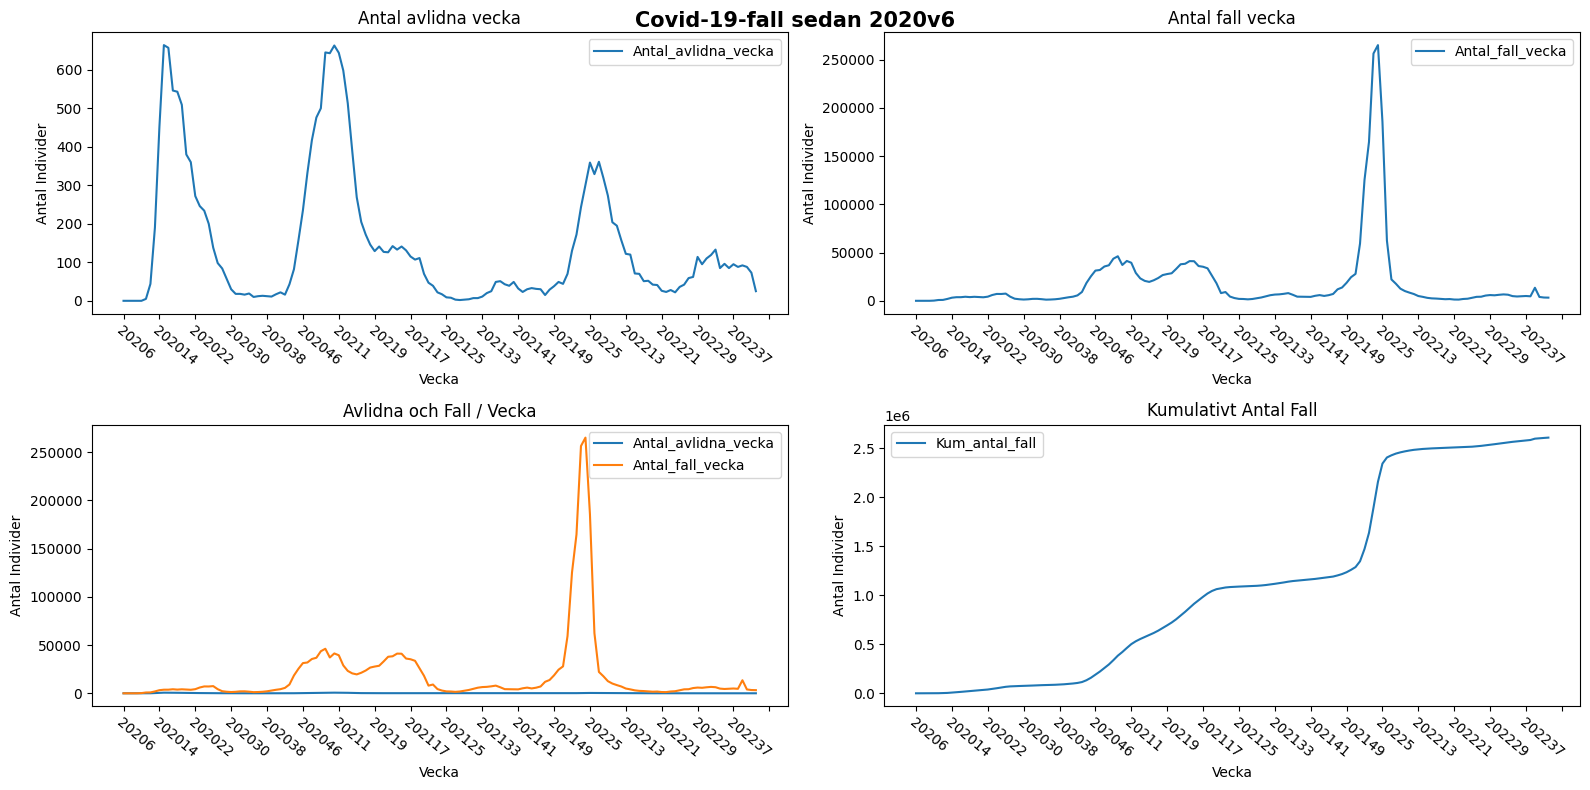

In [22]:
"""The code creates a 2x2 subplot layout, where it draws line charts in each subplot using
 the provided data columns. It adjusts the layout and displays the figure, saves it as an image, 
and shows the figure with the title "Covid-19 Cases since 2020 Week 6"."""

# Create an empty 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Function for drawing line charts
def plot_line_chart(data, x, y, ax, label): 
    sns.lineplot(data=data, x=x, y=y, ax=ax, label=label)

# Create a list of titles and data columns for each subplot
describtion = [
    ("Antal avlidna vecka", ["Antal_avlidna_vecka"]),
    ("Antal fall vecka", ["Antal_fall_vecka"]),
    ("Avlidna och Fall / Vecka", ["Antal_avlidna_vecka", "Antal_fall_vecka"]),
    ("Kumulativt Antal Fall", ["Kum_antal_fall"])
]

# Loop through subplot information and plot a chart in each subplot.
for title, series in describtion:
    ax = axes.flatten()[describtion.index((title, series))]
    for i, serie in enumerate(series):
        plot_line_chart(df, "Vecka", serie, ax, serie)   
        
# Setting title and formatting axes for data visualization        
    ax.set_title(title)
    ax.set_ylabel("Antal Individer")
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.xaxis.set_tick_params(rotation=-40)
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor")

# Adjust the layout and display the figure, save the figure as an image, and show the figure
fig.tight_layout()
fig.suptitle("Covid-19-fall sedan 2020v6", fontsize=15, fontweight="bold")

plt.savefig("Visualiseringar/1C-F_avlidna_fall_veckovis.png", bbox_inches='tight')

plt.show()
  

**Plotly Express**

The code generates four line charts. The first chart displays the number of deaths per week, 
the second shows the number of new cases per week, the third combines both deaths and new cases per week,
 and the fourth illustrates the cumulative cases. 
All charts have a purple line color and are saved as HTML files for visualization.

In [23]:
# C) Create chart 1 'Number of Deaths per Week.
fig = px.line(df, x="Vecka", y="Antal_avlidna_vecka", 
              title="Antal Avlidna per Vecka")
fig.update_traces(line=dict(color='purple'))
fig.write_html("Visualiseringar/1C.Antal_avlidna_vecka.html")
fig.show()

In [24]:
# D) Create a line chart for new cases per week
fig = px.line(df, x="Vecka", y="Antal_fall_vecka", 
              title="Antal Fall per Vecka")
fig.update_traces(line=dict(color='purple'))
fig.write_html("Visualiseringar/1D.Antal_fall_vecka.html")
fig.show()

In [25]:
# E) Create a line chart for both deaths and new cases per week
fig = px.line(df, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"], 
              title="Antal Avlidna och Fall per Vecka")
fig.update_traces(line=dict(color='purple'))
fig.write_html("Visualiseringar/1.E.Antal Avlidna och Fall per Vecka.html")
fig.show()

In [27]:
# F) Create a line chart for cumulative cases
cumulative_cases = df['Antal_fall_vecka'].cumsum() 
fig = px.line(df, x="Vecka", y=cumulative_cases, 
              title="Kumulativt Antal Fall")
fig.update_traces(line=dict(color='purple'))
fig.write_html("Visualiseringar/1F.Kumulativt Antal Fall.html")
fig.show()